## Week 02 Homework

**REGRESSION**

___

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./datasets/laptops.csv", encoding="utf-8", sep=",")

df.columns = df.columns.str.lower().str.replace(' ','_')

In [3]:
df = df[['ram','storage','screen','final_price']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB


<Axes: >

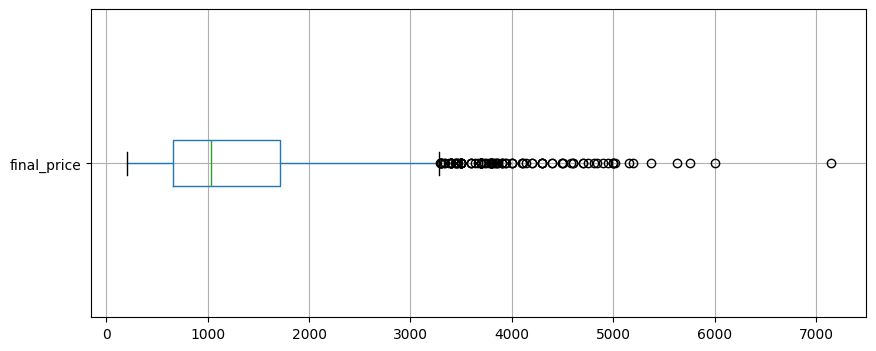

In [5]:
df.boxplot(column='final_price', vert=False, figsize=(10,4))

In [6]:
df['ram'].median()

np.float64(16.0)

___

**Preparing Dataset**

In [7]:
# shuffling
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
# splitting
train_df, temp_df = train_test_split(df_shuffled, test_size=0.4, random_state=42)
test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [9]:
# features and target variable
X_train, Y_train = train_df.drop(columns='final_price'), train_df['final_price']
X_test, Y_test = test_df.drop(columns='final_price'), test_df['final_price']
X_val, Y_val = val_df.drop(columns='final_price'), val_df['final_price']

In [10]:
print(f"Train set: {X_train.shape}, {Y_train.shape}")
print(f"Test set: {X_test.shape}, {Y_test.shape}")
print(f"Validation set: {X_val.shape}, {Y_val.shape}")

Train set: (1296, 3), (1296,)
Test set: (432, 3), (432,)
Validation set: (432, 3), (432,)


___

**Dealing with missing values**

In [12]:
screen_avg = X_train['screen'].mean()
screen_avg

np.float64(15.161871616395977)

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)